# ML Pipelines

# Librerias

In [142]:
# general
import numpy as np
import pandas as pd
import re
import os
import timeit
import joblib
from scipy.stats import randint
from scipy.stats import randint, uniform, geom, expon
from scipy.stats import loguniform

# visualización
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import warn
plt.style.use('seaborn-colorblind')

# preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA


# ML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
import pylab
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# ML pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel

from sklearn import set_config

C:\Users\Diego\AppData\Local\Temp\ipykernel_10872\1811663079.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# Cargar bases de datos preprocesadas

In [15]:
# cargar base de datos
data = pd.read_csv('data/base1.csv')

# hacer copia de base de datos preprocesada
data_copy = data.copy(deep=True)

# quitar NAs
data_copy = data_copy.dropna()
data_copy

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,-1.726220,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,0.432793,-0.473674,PC 17599,0.786845,C85,C
3,3,-1.718444,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,0.432793,-0.473674,113803,0.420730,C123,S
6,6,-1.706781,-0.789272,-1.566107,"McCarthy, Mr. Timothy J",male,1.893459,-0.474545,-0.473674,17463,0.395814,E46,S
10,10,-1.691229,1.266990,0.827377,"Sandstrom, Miss. Marguerite Rut",female,-1.949034,0.432793,0.767630,PP 9549,-0.312172,G6,S
11,11,-1.687341,1.266990,-1.566107,"Bonnell, Miss. Elizabeth",female,2.200858,-0.474545,-0.473674,113783,-0.113846,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,1.656238,1.266990,-1.566107,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,1.355510,0.432793,0.767630,11751,0.409741,D35,S
872,872,1.660126,-0.789272,-1.566107,"Carlsson, Mr. Frans Olof",male,0.279612,-0.474545,-0.473674,695,-0.547748,B51 B53 B55,S
879,879,1.687341,1.266990,-1.566107,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,2.047158,-0.474545,0.767630,11767,1.025945,C50,C
887,887,1.718444,1.266990,-1.566107,"Graham, Miss. Margaret Edith",female,-0.796286,-0.474545,-0.473674,112053,-0.044381,B42,S


In [21]:
data_copy['Fare']

1      0.786845
3      0.420730
6      0.395814
10    -0.312172
11    -0.113846
         ...   
871    0.409741
872   -0.547748
879    1.025945
887   -0.044381
889   -0.044381
Name: Fare, Length: 202, dtype: float64

In [23]:
# definir variables
x_reg = data_copy.drop(columns='Fare')
x_class = data_copy.drop(columns='Sex')

y_reg= data_copy['Fare']  # y dependiente (regresion)
y_class = data_copy['Sex'] # y dependiente (class)


# Cargar Pipelines de Preprocesamiento

In [27]:
# cargar pipelines de preprocesamiento
pipeline_preprocess1 = joblib.load('data/pipeline_preprocess1.pkl')
pipeline_preprocess2 = joblib.load('data/pipeline_preprocess2.pkl')
pipeline_preprocess1 

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

# ML Pipelines

## Construir ML pipelines

In [40]:
# crear ML pipeline 
# pipeline de preprocesamiento + LinReg
lin_reg1 = make_pipeline(pipeline_preprocess2, LinearRegression())

# entrenar ML pipeline con datos de entrenamiento
lin_reg1.fit(x_reg, y_reg)

# crear ML pipeline 
# pipeline de preprocesamiento + DecisionTreeRegressor
tree_reg1 = make_pipeline(pipeline_preprocess2, DecisionTreeRegressor(random_state=42))
tree_reg1.fit(x_reg, y_reg)

# generar predicciones con variables x
tree_pred1 = tree_reg1.predict(x_reg)

# calcular mse sobre las predicciones
tree_rmse1 = mean_squared_error(y_reg, tree_pred1,
                              squared=False)

tree_rmse1

6.764959123737209e-18

## Validación Cruzada

In [51]:
# validación cruzada
# metrica: neg_mean_squared_error
# particiones (cv) = 10
tree_rmses = -cross_val_score(tree_reg1, x_reg, y_reg,
                              scoring="neg_mean_squared_error", cv=10)

cv_mse1 =  pd.Series(tree_rmses).describe() 

# validación cruzada
# metrica: neg_mean_squared_error
# particiones (cv) = 10
lin_rmses = -cross_val_score(lin_reg1, x_reg, y_reg,
                              scoring="neg_root_mean_squared_error", cv=10)
cv_mse2 = pd.Series(lin_rmses).describe()



In [56]:
# crear ML pipeline 
# pipeline de preprocesamiento + RandomForestRegressor
forest_reg1 = make_pipeline(pipeline_preprocess2,
                           RandomForestRegressor(random_state=1))

# validación cruzada
# metrica: neg_mean_squared_error
# particiones (cv) = 3
forest_rmses = -cross_val_score(forest_reg1, x_reg, y_reg,
                                scoring="neg_root_mean_squared_error", cv=3)
cv_mse2 = pd.Series(forest_rmses).describe()
cv_mse2

count    3.000000
mean     1.198958
std      0.589151
min      0.822309
25%      0.859489
50%      0.896670
75%      1.387282
max      1.877895
dtype: float64

In [54]:
# ML pipeline preprocesamiento + RandomForestRegressor
forest_reg1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000024476E8AAD0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002447C961690>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

## Sintonización 

Sintonizar hiper parámetros de ML pipelines

* GridSearchCV
* RandomizedSearchCV

### GridSearch

In [83]:
# crear pipeline para variables numericas
# imputador simple por mediana
# escalador estandar 
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# crear pipeline para variables categiricas
# imputador simple por moda
# codificador one-hot [0-1]
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


# crear ML pipeline 
# variables numéricas: num_pipeline
# variables categóricas: cat_pipeline
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024476EC8C50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000024476EE7B90>)])

In [85]:
y_reg

1      0.786845
3      0.420730
6      0.395814
10    -0.312172
11    -0.113846
         ...   
871    0.409741
872   -0.547748
879    1.025945
887   -0.044381
889   -0.044381
Name: Fare, Length: 202, dtype: float64

In [88]:
data_copy

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,-1.726220,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,0.432793,-0.473674,PC 17599,0.786845,C85,C
3,3,-1.718444,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,0.432793,-0.473674,113803,0.420730,C123,S
6,6,-1.706781,-0.789272,-1.566107,"McCarthy, Mr. Timothy J",male,1.893459,-0.474545,-0.473674,17463,0.395814,E46,S
10,10,-1.691229,1.266990,0.827377,"Sandstrom, Miss. Marguerite Rut",female,-1.949034,0.432793,0.767630,PP 9549,-0.312172,G6,S
11,11,-1.687341,1.266990,-1.566107,"Bonnell, Miss. Elizabeth",female,2.200858,-0.474545,-0.473674,113783,-0.113846,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,1.656238,1.266990,-1.566107,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,1.355510,0.432793,0.767630,11751,0.409741,D35,S
872,872,1.660126,-0.789272,-1.566107,"Carlsson, Mr. Frans Olof",male,0.279612,-0.474545,-0.473674,695,-0.547748,B51 B53 B55,S
879,879,1.687341,1.266990,-1.566107,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,2.047158,-0.474545,0.767630,11767,1.025945,C50,C
887,887,1.718444,1.266990,-1.566107,"Graham, Miss. Margaret Edith",female,-0.796286,-0.474545,-0.473674,112053,-0.044381,B42,S


In [119]:
# crear pipeline end-to-end
# Regresión (y dependiente: )
# ML pipeline preprocesamiento + random_forest
full_pipeline1 = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=1, n_jobs=-1)),
])

# crear grid de hiper parametros de modelo
param_grid = [
    {'random_forest__n_estimators': [50, 100, 200],
      'random_forest__max_features' : ['sqrt','log2',3,5],
      'random_forest__max_depth' : [2,3,5],
      'random_forest__max_features' : ['sqrt','log2',3,5]
    },
    
    {'random_forest__n_estimators': [60, 80, 120],
      'random_forest__max_features' : [3,5,7],
      'random_forest__max_depth' : [2,3,5],
      'random_forest__max_features' : ['sqrt',3,5]
    }
    
]


# ver lista de parámetros
# pipeline__param 
params_list = list(full_pipeline1.get_params().keys() )
params_list


# GridSearchCV: sintonizador de hiper parametros
# parametros: ML pipeline, grid de hiper parametros, particiones (cv)
# scoring: metrica de evaluación a optimizar
grid_search = GridSearchCV(full_pipeline1, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

# sintonizar GridSearchCV con datos de entrenamiento
grid_search.fit(x_reg, y_reg)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024476EC8C50>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=1))]),
             param_grid=[{'random_forest__max_depth': [2, 3, 5],
                          'random_forest__max_features': ['sqrt', 'log2', 3, 5],
                          'random_forest__n_estimators': [50, 100, 200]},
                         {'random_forest__max_depth': [2, 3, 5],
                          'random_forest__max_features': ['sqrt', 3, 5],
                          'random_forest__n_estimators': [60, 80, 120]}],
             scoring='neg_root_mean_squared_error')

In [120]:
# mejores hiper parametros
grid_search.best_params_

{'random_forest__max_depth': 5,
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 200}

In [121]:
# mejor ML pipeline 
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002447FCB8A50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002447FEBD490>)])),
                ('random_forest',
                 RandomForestRegressor(max_depth=5, max_features='sqrt',
                                       n_estimators=200, n_jobs=-1,
                                       random_state=1))])

In [124]:
# ver resultados de validación cruzada
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
26,0.188233,0.004188,0.034981,0.001413,5,sqrt,200,"{'random_forest__max_depth': 5, 'random_forest...",-1.084534,-0.965107,-1.888739,-1.312793,0.410163,1
54,0.080292,0.002493,0.017992,0.000817,5,sqrt,60,"{'random_forest__max_depth': 5, 'random_forest...",-1.070813,-0.978200,-1.896582,-1.315198,0.412835,2
24,0.064632,0.003299,0.016658,0.000472,5,sqrt,50,"{'random_forest__max_depth': 5, 'random_forest...",-1.071871,-0.987159,-1.894419,-1.317816,0.409184,3
56,0.118937,0.004896,0.023654,0.000471,5,sqrt,120,"{'random_forest__max_depth': 5, 'random_forest...",-1.087646,-0.971826,-1.894617,-1.318030,0.410441,4
25,0.118264,0.005438,0.023654,0.001247,5,sqrt,100,"{'random_forest__max_depth': 5, 'random_forest...",-1.085084,-0.985486,-1.896897,-1.322489,0.408198,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.084954,0.004963,0.017657,0.000471,2,3,80,"{'random_forest__max_depth': 2, 'random_forest...",-1.279298,-1.113367,-1.930602,-1.441089,0.352704,59
39,0.083622,0.003298,0.017190,0.000589,2,3,60,"{'random_forest__max_depth': 2, 'random_forest...",-1.279093,-1.117019,-1.929918,-1.442010,0.351291,60
7,0.111608,0.005434,0.021322,0.002623,2,3,100,"{'random_forest__max_depth': 2, 'random_forest...",-1.279843,-1.119191,-1.932317,-1.443784,0.351617,61
8,0.173243,0.007359,0.031157,0.001851,2,3,200,"{'random_forest__max_depth': 2, 'random_forest...",-1.277075,-1.121258,-1.933087,-1.443807,0.351773,62


### Randomized Search

Escoger **distribución** de muestreo de hiper-parámetros

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.

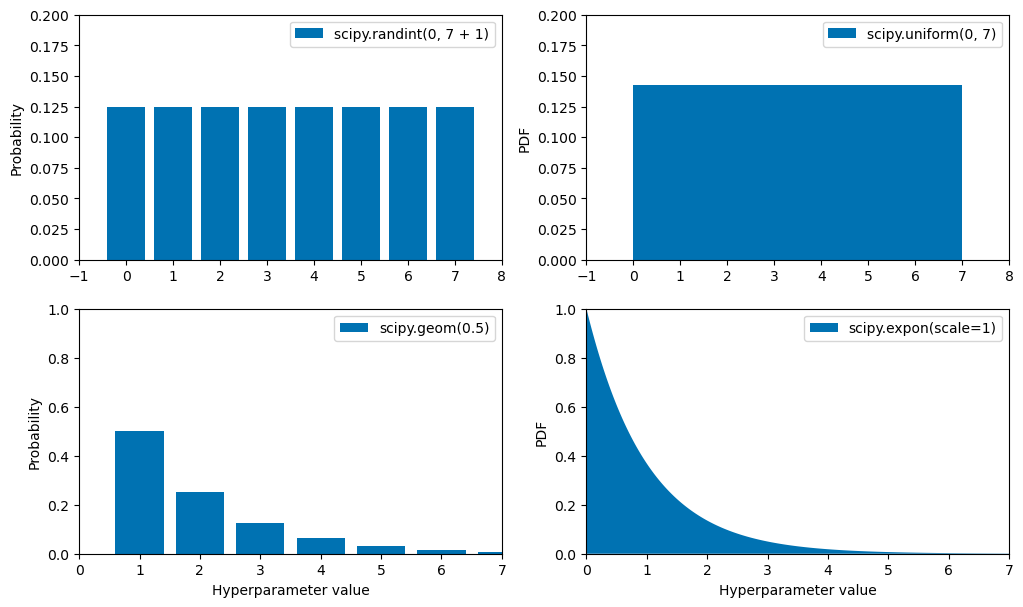

In [143]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

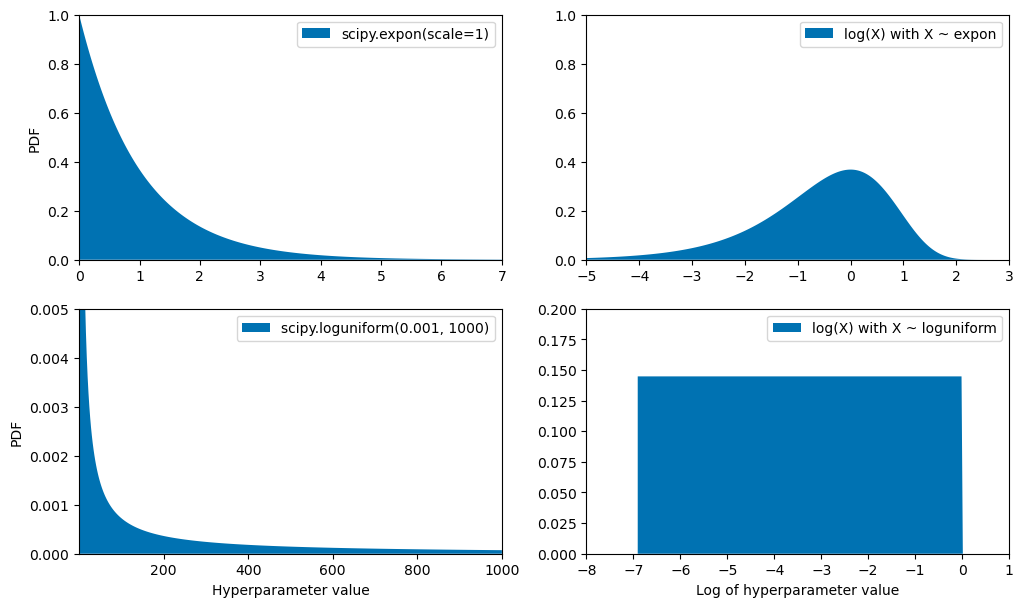

In [144]:
xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

In [132]:
# grid de hiper parámetros para Randomized Search con distribuciones
param_distribs = [
    {'random_forest__n_estimators': randint(low=20, high=100),
      'random_forest__max_features' : ['sqrt','log2',3,5],
      'random_forest__max_depth' : randint(low=3, high=10),
      'random_forest__max_features' : randint(low=3, high=50)
    },
    {'random_forest__n_estimators': randint(low=5, high=10),
      'random_forest__max_features' : ['sqrt','log2',3,7],
      'random_forest__max_depth' : randint(low=8, high=15),
      'random_forest__max_features' : randint(low=5, high=10)
    }
    
]

# RandomizedSearchCV: sintonizador de hiper parametros
# parametros: ML pipeline, grid de hiper parametros de distribucion, particiones (cv)
# scoring: metrica de evaluación a optimizar
rnd_search = RandomizedSearchCV(
    full_pipeline1, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=1)

# sintonizar GridSearchCV con datos de entrenamiento
rnd_search.fit(x_reg, y_reg)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000024476EC8C50>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer'...
                                        {'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002447EAD0490>,
                                         'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002447FA1C5D0>,
                                         'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000244002B7910>}],
                   random_state=1, scoring='neg_root_mean_squared_error')

In [133]:
# ver resultados de validación cruzada
cv_res1 = pd.DataFrame(rnd_search.cv_results_)
cv_res1.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.050302,0.000940,0.014326,4.718201e-04,8,44,29,"{'random_forest__max_depth': 8, 'random_forest...",-0.942768,-0.895357,-1.853143,-1.230423,0.440755,1
4,0.057606,0.002376,0.015326,1.245812e-03,9,40,38,"{'random_forest__max_depth': 9, 'random_forest...",-0.950474,-0.908033,-1.860685,-1.239731,0.439423,2
5,0.062531,0.000787,0.016990,8.920806e-07,6,45,48,"{'random_forest__max_depth': 6, 'random_forest...",-0.996960,-0.906246,-1.870024,-1.257743,0.434529,3
6,0.025652,0.000471,0.012994,1.413268e-03,14,7,9,"{'random_forest__max_depth': 14, 'random_fores...",-1.097720,-0.929942,-1.862815,-1.296826,0.406034,4
3,0.021317,0.000460,0.011327,4.715390e-04,12,6,7,"{'random_forest__max_depth': 12, 'random_fores...",-1.067353,-1.001350,-1.878647,-1.315783,0.398916,5
0,1.016331,0.887782,0.012659,3.089388e-03,11,9,5,"{'random_forest__max_depth': 11, 'random_fores...",-1.171053,-1.013877,-1.796115,-1.327015,0.337853,6
1,0.019656,0.000942,0.010163,2.381016e-04,9,8,5,"{'random_forest__max_depth': 9, 'random_forest...",-1.046011,-1.068319,-1.874371,-1.329567,0.385342,7
2,0.095620,0.002052,0.019989,4.495664e-07,4,15,91,"{'random_forest__max_depth': 4, 'random_forest...",-1.134865,-0.995472,-1.900099,-1.343478,0.397683,8
9,0.019651,0.000468,0.011333,4.762051e-04,13,6,6,"{'random_forest__max_depth': 13, 'random_fores...",-1.175261,-1.001781,-1.855948,-1.344330,0.368636,9
7,0.019330,0.000480,0.010988,8.431617e-06,9,6,5,"{'random_forest__max_depth': 9, 'random_forest...",-1.146171,-1.108914,-1.887538,-1.380874,0.358588,10


## Evaluación de Modelo

In [146]:
# extraer mejor modelo de ML pipeline
final_model = rnd_search.best_estimator_  # includes preprocessing 

# importancia de variables (interpretacion de modelo)
feature_importances = final_model["random_forest"].feature_importances_

# extraer importancia de variables 
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1449957777127801, 'pipeline-2__Ticket_PC 17755'),
 (0.0989684212530223, 'pipeline-2__Cabin_B101'),
 (0.05138249189729136, 'pipeline-2__Ticket_19950'),
 (0.04876987419716658, 'pipeline-1__SibSp'),
 (0.04483185819722074, 'pipeline-2__Name_Cardeza, Mr. Thomas Drake Martinez'),
 (0.04100864227949304, 'pipeline-1__Pclass'),
 (0.03880951887848767, 'pipeline-2__Name_Lesurer, Mr. Gustave J'),
 (0.030796897775495952, 'pipeline-2__Cabin_C23 C25 C27'),
 (0.02979534906270534, 'pipeline-2__Cabin_B51 B53 B55'),
 (0.029064912329602288, 'pipeline-2__Cabin_B58 B60'),
 (0.02689283127563338, 'pipeline-1__Parch'),
 (0.022142396679241734, 'pipeline-2__Ticket_PC 17558'),
 (0.020473608162910818, 'pipeline-2__Cabin_B5'),
 (0.020408064213542198, 'pipeline-2__Cabin_C45'),
 (0.019754240285001178, 'pipeline-2__Ticket_PC 17757'),
 (0.01951468707769445, 'pipeline-2__Ticket_24160'),
 (0.018460642896531522, 'pipeline-1__Unnamed: 0'),
 (0.017641269793231374, 'pipeline-2__Name_Fortune, Mr. Mark'),
 (0.0160666146297